
Project Air BNB



1) Calculate How many properties in each neighbourhood group

2) Which Neighbour Hood Group Has highest prices use bar chart to show this for all neighbourhood groups

3) Which Neighbourhood group has lowest prices use bar chart to show this for all neighbourhood groups

4) Highest and lowest price airbnb in each Neighbour Hood Group in dict with most expensive and least expensive

5) Which Host has highest count of properties

6) Which neighbourhood is most expensive and cheapest top 10 barchart

7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

8) scatter plot between longitutude and latitude for different neighbourhood groups

9) scatter plot between longitutude and latitude for different room_types

10) room_type vs price bar chart for the mean and highest and lowest

11) Do a similar plot to this


In [ ]:
import pandas as pd

In [ ]:
path = '/content/AB_NYC_2019.csv'
df = pd.read_csv(path)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

1) Calculate How many properties in each neighbourhood group

In [ ]:
properties = df.groupby('id')['neighbourhood_group'].count()
result = properties.sum()
result

48895

In [ ]:
average_prices = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

In [ ]:
cleaned_df = df.dropna(subset=['name','host_name'], inplace = True)

In [ ]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df['last_review'].fillna(method='ffill', inplace=True)
df['reviews_per_month'].fillna(method='bfill', inplace=True)

In [ ]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
median_review= df['reviews_per_month'].median()
df['reviews_per_month'].fillna(median_review, inplace=True)

#2 Which NeighbourHood Group Has highest prices
   Use bar chart to show this for all neighbourhood groups

In [ ]:
average_prices = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
highest_price_neighborhood = average_prices.idxmax()
highest_price = average_prices.max()

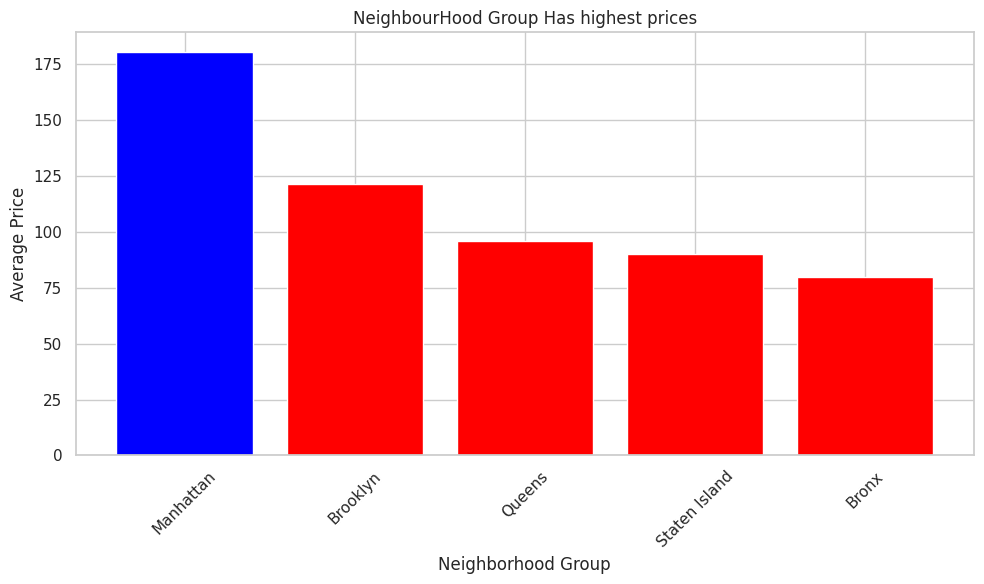

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
colors = ['blue' if group == highest_price_neighborhood else 'red' for group in average_prices.index]
plt.bar(average_prices.index, average_prices, color=colors)
plt.title('NeighbourHood Group Has highest prices')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#3. Which NeighbourHood Group Has lowest prices
    Use bar chart to show this for all neighbourhood groups

In [ ]:
average_prices = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
lowest_price_neighborhood = average_prices.idxmin()
least_expensive_prices = average_prices.min()

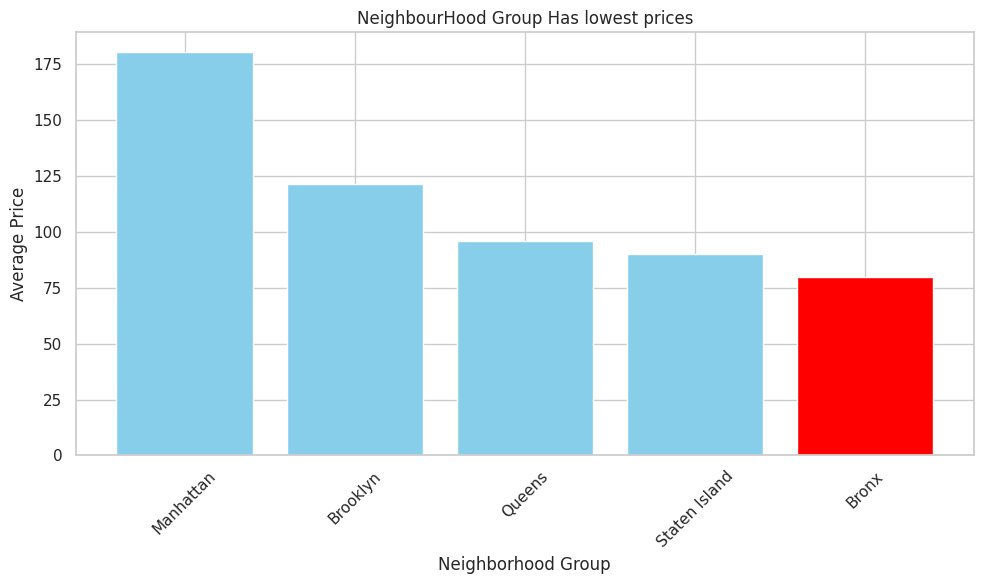

In [ ]:
plt.figure(figsize=(10, 6))

colors = ['red' if group == lowest_price_neighborhood else 'skyblue' for group in average_prices.index]

plt.bar(average_prices.index, average_prices, color=colors)
plt.title('NeighbourHood Group Has lowest prices')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4) Highest and lowest price airbnb in each Neighbour Hood Group in dict with most expensive and least expensive

In [ ]:
import pandas as pd

highest_prices = {}
lowest_prices = {}

highest_prices = df.groupby('neighbourhood_group')['price'].max().reset_index()
lowest_prices = df.groupby('neighbourhood_group')['price'].min().reset_index()

highest_prices_dict = highest_prices.set_index('neighbourhood_group')['price'].to_dict()
lowest_prices_dict = lowest_prices.set_index('neighbourhood_group')['price'].to_dict()

print("Highest Prices for Each Neighborhood:")
print(highest_prices_dict)

print("\nLowest Prices for Each Neighborhood:")
print(lowest_prices_dict)

Highest Prices for Each Neighborhood:
{'Bronx': 800, 'Brooklyn': 10000, 'Manhattan': 9999, 'Queens': 10000, 'Staten Island': 625}

Lowest Prices for Each Neighborhood:
{'Bronx': 0, 'Brooklyn': 0, 'Manhattan': 10, 'Queens': 10, 'Staten Island': 13}


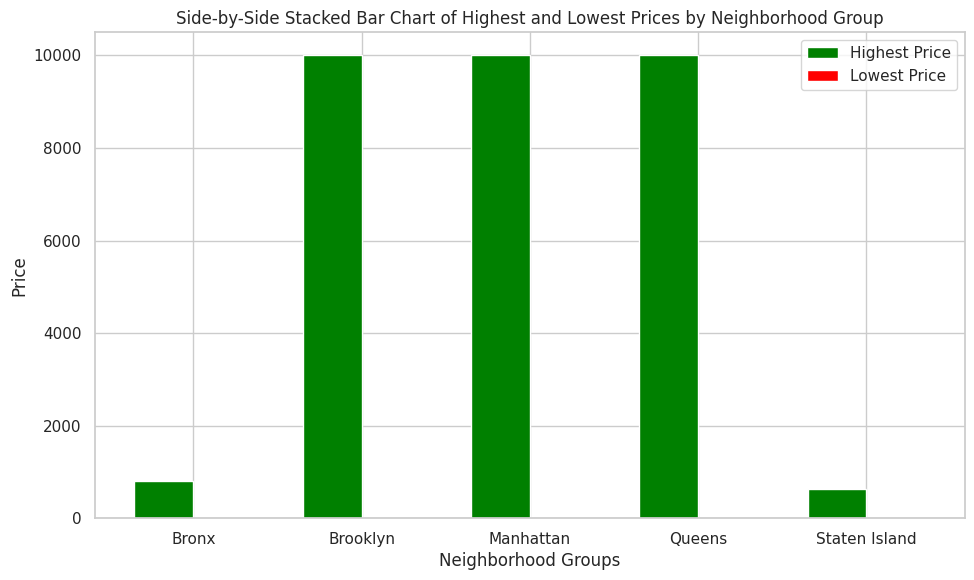

In [ ]:
import numpy as np

neighborhoods = list(highest_prices_dict.keys())

plt.figure(figsize=(10, 6))


x = np.arange(len(neighborhoods))

bar_width = 0.35

plt.bar(x - bar_width/2, highest_prices_dict.values(), bar_width, color='green', label='Highest Price')

plt.bar(x + bar_width/2, lowest_prices_dict.values(), bar_width, color='red', label='Lowest Price')

plt.xlabel('Neighborhood Groups')
plt.ylabel('Price')
plt.title('Side-by-Side Stacked Bar Chart of Highest and Lowest Prices by Neighborhood Group')
plt.xticks(x, neighborhoods)
plt.legend()
plt.show()

5) Which Host has highest count of properties

In [ ]:
host_name=df['host_name'].unique()

In [ ]:
host_count = df['host_name'].value_counts()
highest_count_host = host_count.idxmax()
highest_count = host_count.max()

print(highest_count_host,'has a',highest_count,'properties')

Michael has a 335 properties


6) Which neighbourhood is most expensive and cheapest top 10 barchart

In [ ]:
neighbourhood_count = df['neighbourhood'].value_counts()
neighbourhood_count

Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Holliswood               2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 218, dtype: int64

In [ ]:
mean_prices = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
mean_prices

neighbourhood
Sea Gate             482.500000
Tribeca              460.300000
NoHo                 298.451613
Flatiron District    291.482759
SoHo                 281.303136
                        ...    
Hunts Point           51.812500
Tremont               49.900000
Bull's Head           48.000000
Little Neck           42.333333
New Dorp Beach        38.000000
Name: price, Length: 218, dtype: float64

In [ ]:
most_expensive_neighborhood = mean_prices.head(10)
print("Top 10 Most Expensive Neighborhoods:", most_expensive_neighborhood)

Top 10 Most Expensive Neighborhoods: neighbourhood
Sea Gate             482.500000
Tribeca              460.300000
NoHo                 298.451613
Flatiron District    291.482759
SoHo                 281.303136
Neponsit             274.666667
Midtown              267.583164
West Village         250.326230
Willowbrook          249.000000
Greenwich Village    239.120915
Name: price, dtype: float64


In [ ]:
mean_prices = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
cheapest_neighborhood = mean_prices.head(10)
print("Top 10 Most Cheapest Neighborhoods:", cheapest_neighborhood)

Top 10 Most Cheapest Neighborhoods: neighbourhood
New Dorp Beach    38.000000
Little Neck       42.333333
Bull's Head       48.000000
Tremont           49.900000
Hunts Point       51.812500
Bronxdale         51.875000
Soundview         52.846154
Olinville         53.000000
Corona            56.932203
Van Nest          58.555556
Name: price, dtype: float64


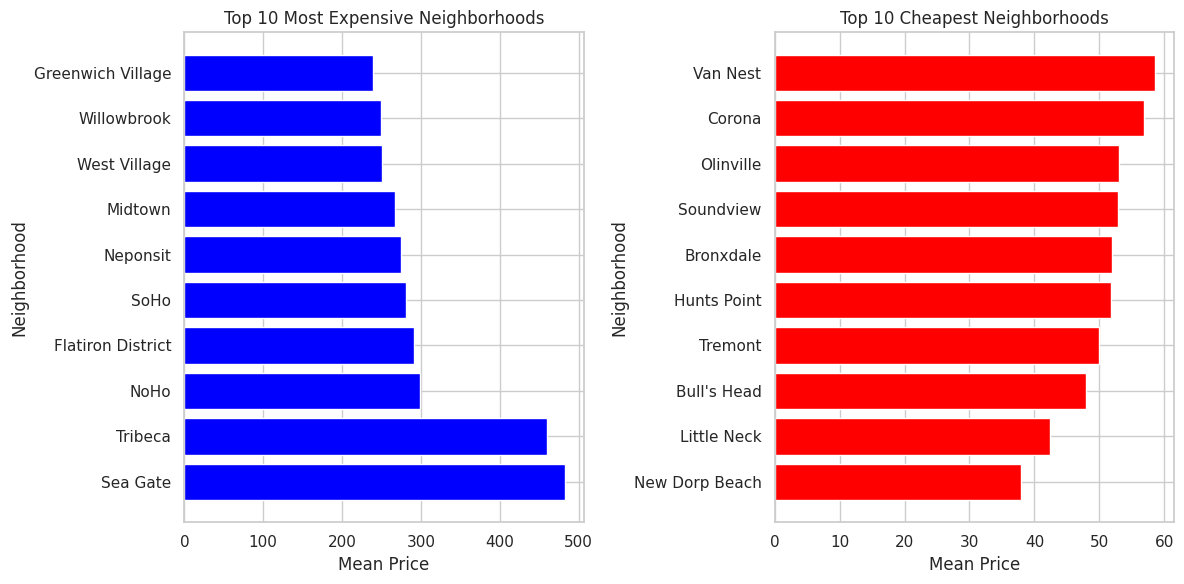

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(most_expensive_neighborhood.index, most_expensive_neighborhood.values, color='blue')
plt.xlabel('Mean Price')
plt.ylabel('Neighborhood')
plt.title('Top 10 Most Expensive Neighborhoods')

plt.subplot(1, 2, 2)
plt.barh(cheapest_neighborhood.index, cheapest_neighborhood.values, color='red')
plt.xlabel('Mean Price')
plt.ylabel('Neighborhood')
plt.title('Top 10 Cheapest Neighborhoods')

plt.tight_layout()
plt.show()

7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

In [ ]:
room_type =df['room_type'].value_counts()
room_type

Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64

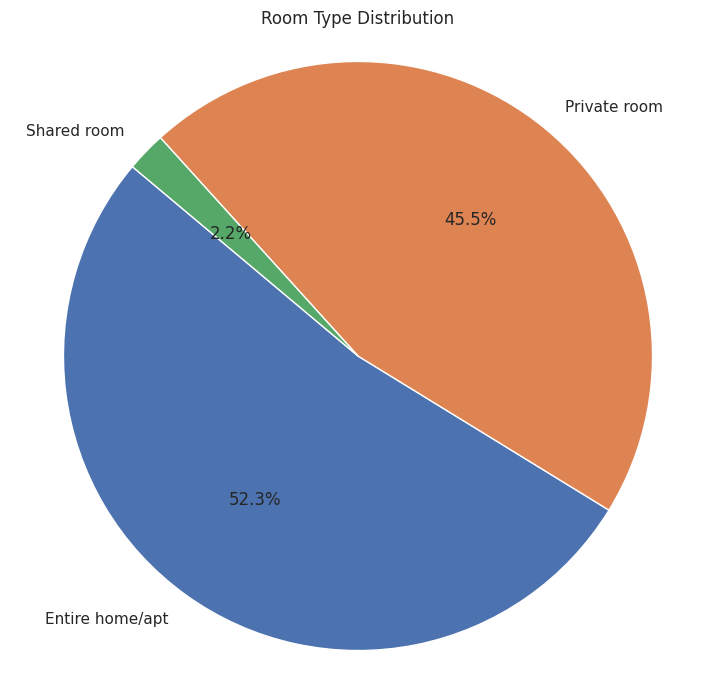

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(room_type, labels=room_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Room Type Distribution')
plt.axis('equal')

plt.show()

8) scatter plot between longitutude and latitude for different neighbourhood groups

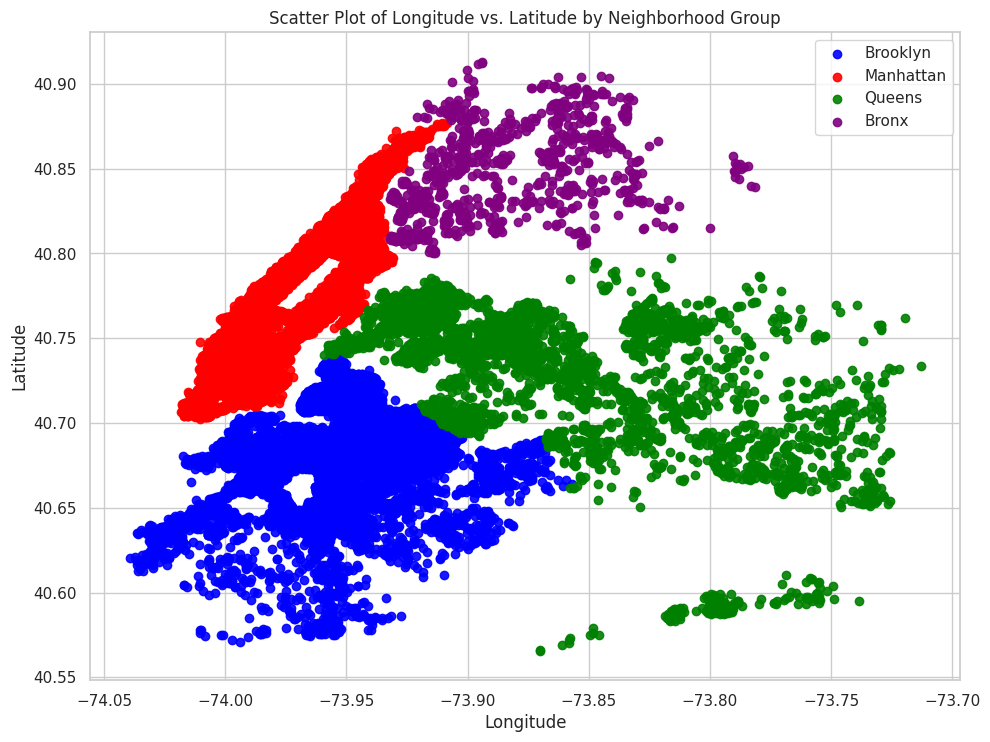

In [ ]:
colors = {'Brooklyn': 'blue', 'Manhattan': 'red', 'Queens': 'green', 'Bronx': 'purple'}
plt.figure(figsize=(10, 8))


for neighborhood_group, color in colors.items():
  group_df = df[df['neighbourhood_group'] == neighborhood_group]
  plt.scatter(group_df['longitude'], group_df['latitude'], label=neighborhood_group, color=color, alpha=0.9)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs. Latitude by Neighborhood Group')
plt.legend()
plt.grid(True)
plt.show()

9) scatter plot between longitutude and latitude for different room_types

<Axes: xlabel='latitude', ylabel='longitude'>

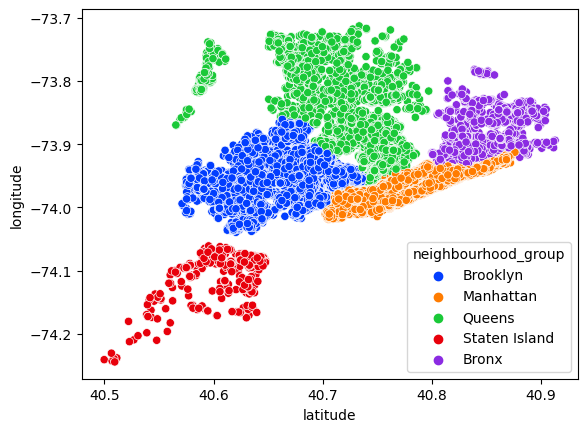

In [ ]:
import seaborn as sns
sns.scatterplot(data=df,x='latitude',y='longitude',hue='neighbourhood_group',palette='bright')

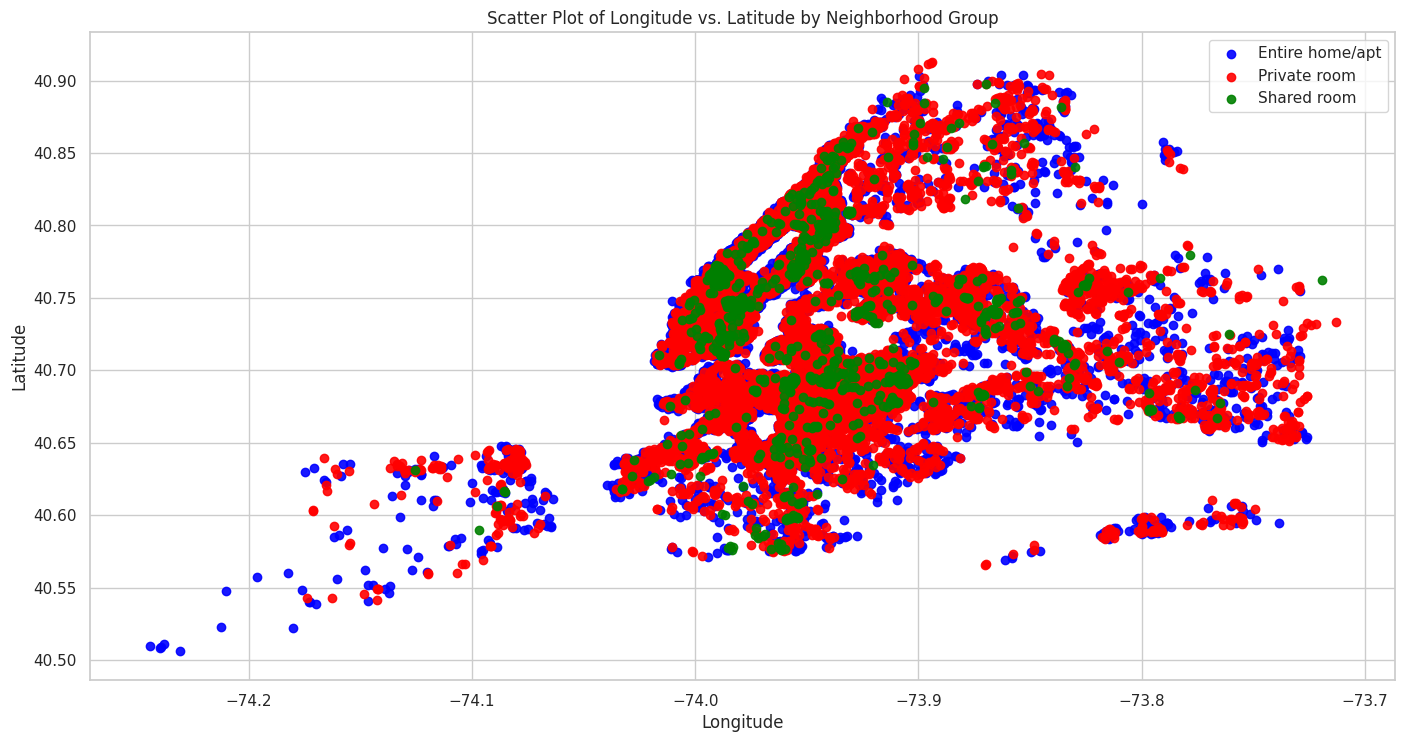

In [ ]:
colors = {'Entire home/apt': 'blue', 'Private room': 'red', 'Shared room': 'green'}
plt.figure(figsize=(15, 8))


for room_type, color in colors.items():
  df1 = df[df['room_type'] == room_type]
  plt.scatter(df1['longitude'], df1['latitude'], label=room_type, color=color, alpha=0.9)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs. Latitude by Neighborhood Group')
plt.legend()
plt.grid(True)
plt.show()

10) room_type vs price bar chart for the mean and highest and lowest

In [ ]:
mprice_for_room_type = df.groupby('room_type')['price'].mean()
hprice_for_room_type = df.groupby('room_type')['price'].max()
lprice_for_room_type = df.groupby('room_type')['price'].min()

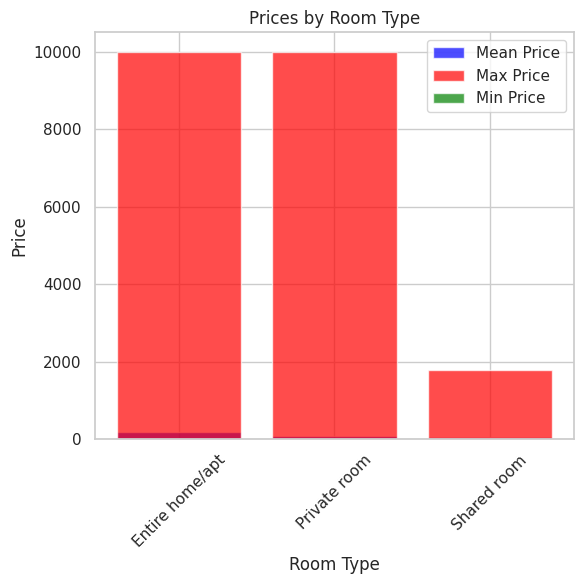

In [ ]:
plt.figure(figsize=(6, 6))
room_types = mprice_for_room_type.index

plt.bar(room_types, mprice_for_room_type, label='Mean Price', color='blue', alpha=0.7)
plt.bar(room_types, hprice_for_room_type, label='Max Price', color='red', alpha=0.7)
plt.bar(room_types, lprice_for_room_type, label='Min Price', color='green', alpha=0.7)

plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Prices by Room Type')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

11.Do a similar plot

<Axes: xlabel='room_type', ylabel='count'>

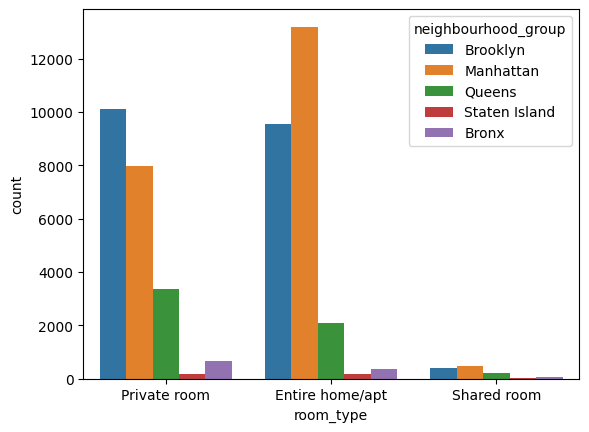

In [ ]:
import seaborn as sns
sns.countplot(x ='room_type', data = df,hue='neighbourhood_group')

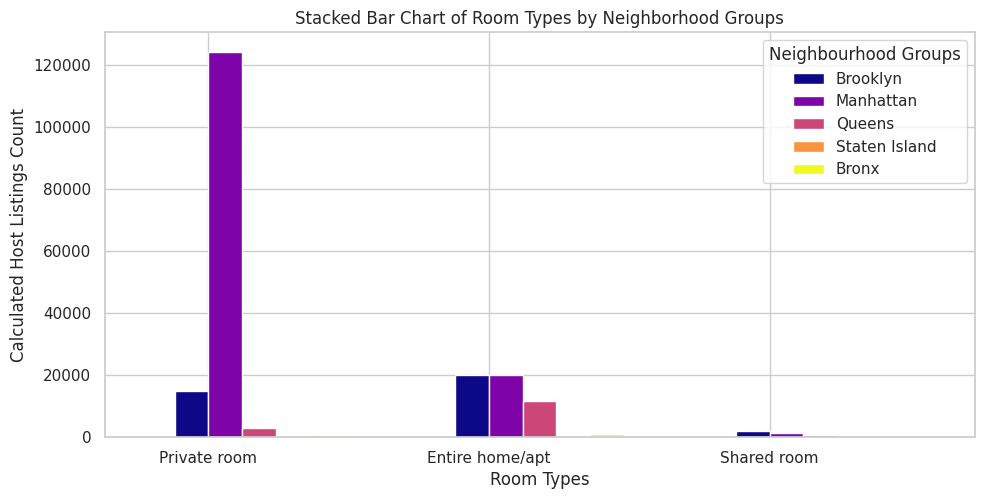

In [ ]:
data_grouped = df.groupby(['room_type', 'neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()

unique_neighborhood = df['neighbourhood_group'].unique()
room_types = df['room_type'].unique()

pivot_df = data_grouped.pivot(index='room_type', columns='neighbourhood_group', values='calculated_host_listings_count')
pivot_df = pivot_df[unique_neighborhood]

pivot_df.plot(kind='bar', figsize=(10, 5), width=0.6, position=0.2, colormap='plasma')

plt.xlabel('Room Types')
plt.ylabel('Calculated Host Listings Count')
plt.title('Stacked Bar Chart of Room Types by Neighborhood Groups')
plt.legend(title='Neighbourhood Groups', loc='upper right')
plt.xticks(range(len(room_types)), room_types, rotation=0)

plt.show()